In [28]:
from qiskit import *

In [29]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble

In [30]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.providers.aer.noise import pauli_error

Taken from the Qiskit textbook: https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html

In [76]:
qr = QuantumRegister(5)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [77]:
def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

In [78]:
for circuit in meas_calibs:
    print('Circuit',circuit.name)
    print(circuit)
    print()

Circuit mcalcal_00000
          ░ ┌─┐            
q4855_0: ─░─┤M├────────────
          ░ └╥┘┌─┐         
q4855_1: ─░──╫─┤M├─────────
          ░  ║ └╥┘┌─┐      
q4855_2: ─░──╫──╫─┤M├──────
          ░  ║  ║ └╥┘┌─┐   
q4855_3: ─░──╫──╫──╫─┤M├───
          ░  ║  ║  ║ └╥┘┌─┐
q4855_4: ─░──╫──╫──╫──╫─┤M├
          ░  ║  ║  ║  ║ └╥┘
   c5: 5/════╩══╩══╩══╩══╩═
             0  1  2  3  4 

Circuit mcalcal_00001
         ┌───┐ ░ ┌─┐            
q4855_0: ┤ X ├─░─┤M├────────────
         └───┘ ░ └╥┘┌─┐         
q4855_1: ──────░──╫─┤M├─────────
               ░  ║ └╥┘┌─┐      
q4855_2: ──────░──╫──╫─┤M├──────
               ░  ║  ║ └╥┘┌─┐   
q4855_3: ──────░──╫──╫──╫─┤M├───
               ░  ║  ║  ║ └╥┘┌─┐
q4855_4: ──────░──╫──╫──╫──╫─┤M├
               ░  ║  ║  ║  ║ └╥┘
   c5: 5/═════════╩══╩══╩══╩══╩═
                  0  1  2  3  4 

Circuit mcalcal_00010
               ░ ┌─┐            
q4855_0: ──────░─┤M├────────────
         ┌───┐ ░ └╥┘┌─┐         
q4855_1: ┤ X ├─░──╫─┤M├─────────
       

In [79]:
qasm_sim = Aer.get_backend('qasm_simulator')

# Execute the calibration circuits without noise
t_qc = transpile(meas_calibs, qasm_sim)
qobj = assemble(t_qc, shots=10000)
cal_results = qasm_sim.run(qobj, shots=10000).result()

In [80]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
meas_fitter.cal_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [81]:
noise_model = get_noise(0.1)

In [87]:
t_qc = transpile(meas_calibs, qasm_sim)
qobj = assemble(t_qc, shots=10000)
cal_results = qasm_sim.run(qobj, noise_model=noise_model, shots=10000).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

meas_fitter.cal_matrix

array([[5.893e-01, 6.310e-02, 6.400e-02, ..., 1.000e-04, 0.000e+00,
        0.000e+00],
       [6.370e-02, 5.860e-01, 8.300e-03, ..., 1.200e-03, 0.000e+00,
        0.000e+00],
       [6.460e-02, 7.900e-03, 5.861e-01, ..., 0.000e+00, 5.000e-04,
        3.000e-04],
       ...,
       [0.000e+00, 1.800e-03, 0.000e+00, ..., 5.838e-01, 7.600e-03,
        6.370e-02],
       [0.000e+00, 0.000e+00, 5.000e-04, ..., 9.300e-03, 5.889e-01,
        7.060e-02],
       [0.000e+00, 0.000e+00, 2.000e-04, ..., 6.590e-02, 6.610e-02,
        5.882e-01]])

In [90]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.y(1)
qc.x(4)
qc.cx(3,4)
qc.measure_all()


t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=10000)
results = qasm_sim.run(qobj, noise_model=noise_model, shots=10000).result()
noisy_counts = results.get_counts()
print(noisy_counts)

{'10110': 368, '10010': 2999, '11011': 39, '10101': 2903, '00101': 337, '10100': 377, '11101': 322, '11001': 47, '10000': 376, '10011': 373, '00010': 304, '10001': 350, '11010': 344, '00110': 33, '11110': 46, '10111': 369, '11100': 45, '00100': 49, '11000': 44, '11111': 41, '00001': 39, '01101': 35, '01110': 5, '00000': 30, '00111': 42, '00011': 39, '01010': 31, '01001': 2, '01111': 4, '01100': 1, '01000': 3, '01011': 3}


In [91]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts()

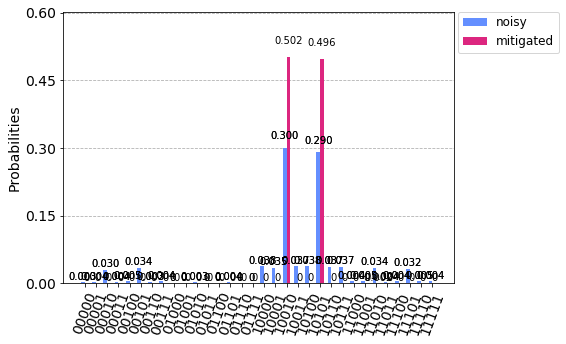

In [92]:
from qiskit.visualization import plot_histogram 
noisy_counts = results.get_counts()
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

Now we run the Trotter circuit with error mitigation

In [41]:
#Modify the h_Z function so we have the correct model
def h_Z(qc,h,dt):
    for i in range(5):
        if i==0 or i==4:
            qc.rz(h*dt,i)
        else:
            qc.rz(2*h*dt,i)
        
def X_Rabi(qc,Omega,dt): # Rabi coupling
    
    for i in range(5):
        
        qc.rx(2*Omega*dt,i)
        
def ZZ(qc,V,dt): # nearest neighbor coupling
    
    qc.cx(0,1)
    
    qc.rz(-2*V*dt,1)
    
    qc.cx(0,1)
    
    qc.cx(2,3)
    
    qc.rz(-2*V*dt,3)
    
    qc.cx(2,3)
    
    qc.cx(1,2)
    
    qc.rz(-2*V*dt,2)
    
    qc.cx(1,2)
    
    qc.cx(3,4)
    
    qc.rz(-2*V*dt,4)
    
    qc.cx(3,4)

In [42]:
def Trotter_circuit_5_site(h,Omega,V,T,n):
    
    Trotter_circuits = []
    
    dt=T/n
    
    for i in range(n):
        
        Trotter_circuit = QuantumCircuit(5)
        
        ### Initial state setting
        
        Trotter_circuit.x(1)
        
        Trotter_circuit.x(3)
        
        ###
        
        Trotter_circuit.barrier()
        
        for k in range(i):
            X_Rabi(Trotter_circuit,Omega,dt) # Rabi coupling from the second term of Hamiltonian
            
            h_Z(Trotter_circuit,h,dt) # Z field 
            
            ZZ(Trotter_circuit,V,dt) # Nearest neighbor hopping term
            
            Trotter_circuit.barrier()
            
        Trotter_circuit.measure_all()
        
        Trotter_circuits.append(Trotter_circuit)
        
    return Trotter_circuits
    
    

In [43]:
Omega = 0.2*2

V = 1*2

T = 10 # Total time 

TT=T

n = 20

NN=n

Trotter_circuit = Trotter_circuit_5_site(2*V,Omega,V,T,n)

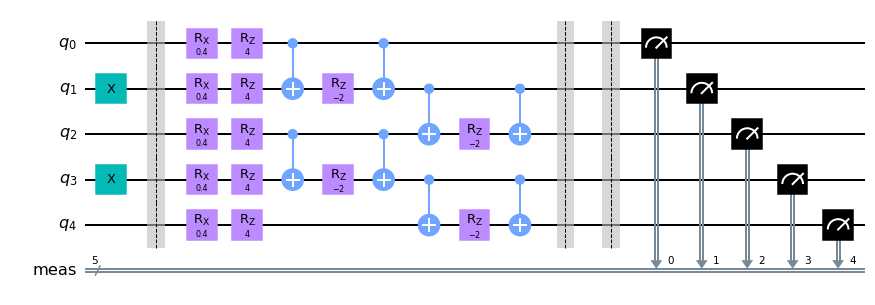

In [45]:
Trotter_circuit[1].draw(output='mpl')

In [46]:
qr = QuantumRegister(5)

qubit_list = [0,1,2,3,4]

meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')

In [55]:
from qiskit.test.mock import FakeVigo

shots = 8192

#Initial Layout
il = [0,1,2,3,4]

backend = FakeVigo()

#ideal simulated results
Trotter_circuit_sim = execute(Trotter_circuit, Aer.get_backend('qasm_simulator'), 
                              shots=shots, initial_layout=il)

#Noise model results using FakeVigo
Trotter_mit  = execute(meas_calibs, backend, shots=shots, initial_layout=il)

In [59]:
# result_counts = Trotter_mit.result()

# results = Trotter_result.result()

In [60]:
cal_results = Trotter_mit.result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')

In [67]:
import numpy as np

Sz_mit = []
for i in range(NN):
    tot_mit=np.zeros(5) 
    mitigated_counts = meas_fitter.filter.apply(results).get_counts(i)
    for j in range(2**5):
        n=2**5
        if j in mitigated_counts.int_outcomes():
            a=bin(n+j)[3:]
            c= ' '
            tot_mit+=(2*np.array(c.join(a).split()).astype(int)-1)*mitigated_counts.int_outcomes()[j]
    Sz_mit.append(tot_mit/shots)
Sz_mit=np.array(Sz_mit)

In [68]:
Sz_mit

array([[-1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00],
       [-9.79156459e-01,  9.82993353e-01, -9.45107746e-01,
         1.00000000e+00, -1.00000000e+00],
       [-7.44331520e-01,  7.68386649e-01, -8.76580488e-01,
         7.70114900e-01, -8.28597210e-01],
       [-4.50147019e-01,  4.96304027e-01, -9.74032104e-01,
         4.56334719e-01, -5.19685503e-01],
       [-2.26226023e-01,  2.04667812e-01, -9.56581218e-01,
         2.16747291e-01, -2.40022566e-01],
       [-1.11997478e-01,  2.99611535e-02, -8.34942718e-01,
         9.68167026e-03, -1.21712289e-01],
       [-1.50462337e-01, -5.37135856e-02, -7.78056118e-01,
        -5.65693931e-02, -1.34308026e-01],
       [-2.90257495e-01, -4.74815279e-02, -6.78545394e-01,
        -6.69163710e-02, -2.99205136e-01],
       [-4.51478559e-01, -1.50676775e-04, -5.69683135e-01,
        -1.89749312e-02, -4.67259368e-01],
       [-5.98530599e-01, -1.68262756e-02, -4.91938358e-01,
        -9.61644919e-03

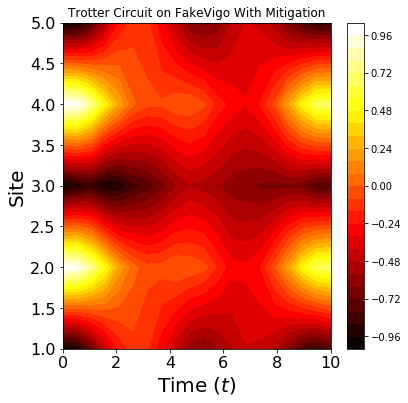

In [70]:
import matplotlib.pyplot as plt

t=np.linspace(0,TT,NN)
l=np.linspace(1,5,5)
tt, ll = np.meshgrid(t, l)

fig, ax = plt.subplots(figsize=(6,6))
cg=ax.contourf(tt, ll, np.transpose(Sz_mit), 30, vmin=-1, vmax=1, cmap='hot')

fig.colorbar(cg, ax=ax)

ax.set_ylabel('Site', fontsize =20)
ax.set_xlabel('Time $(t)$', fontsize =20)

plt.title('Trotter Circuit on FakeVigo With Mitigation')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [72]:
#Get the data for each qubit individually
q0_mit_list = []
q1_mit_list = []
q2_mit_list = []
q3_mit_list = []
q4_mit_list = []

for x in range(0,len(Sz_mit)):
    q0_nomit_list.append(Sz_mit[x,0])
    q1_nomit_list.append(Sz_mit[x,1])
    q2_nomit_list.append(Sz_mit[x,2])
    q3_nomit_list.append(Sz_mit[x,3])
    q4_nomit_list.append(Sz_mit[x,4])

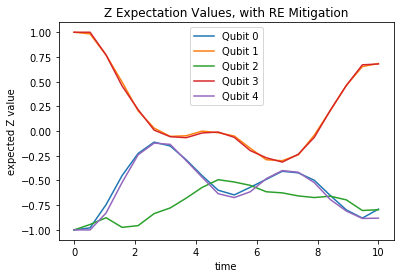

In [75]:
fig,ax = plt.subplots()
ax.plot(t, q0_nomit_list, label='Qubit 0')
ax.plot(t, q1_nomit_list, label='Qubit 1')
ax.plot(t, q2_nomit_list, label='Qubit 2')
ax.plot(t, q3_nomit_list, label='Qubit 3')
ax.plot(t, q4_nomit_list, label='Qubit 4')
ax.set_xlabel('time')
ax.set_ylabel('expected Z value')
ax.set_title("Z Expectation Values, with  Mitigation")
ax.legend()